In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_D=pd.read_csv('Daily_Data.csv',sep=',',engine='python',encoding='big5')

In [3]:
df_D

,證券代碼,簡稱,年月日,收盤價,成交值,流通在外股數
0,2330,台積電,20180420,229.00,29837344,25930380
1,2330,台積電,20170202,184.50,28731441,25930380
2,2330,台積電,20171130,226.00,25539072,25930380
3,2330,台積電,20180206,239.00,24944565,25930380
4,2330,台積電,20180720,237.50,24367904,25930380
...,...,...,...,...,...,...
830887,8215,明基材,20120702,10.60,5841,320674
830888,8249,菱光,20120702,10.31,7849,127055
830889,8261,富鼎,20120702,15.88,2602,144395
830890,8271,宇瞻,20120702,19.01,78659,128635


In [4]:
df_D = df_D.sort_values(['證券代碼','年月日']).reset_index(drop='True')

df_D['市值'] = df_D['收盤價'] * df_D['流通在外股數']*1000
df_D['20V'] = df_D.groupby('證券代碼')['成交值'].rolling(20,min_periods=20).mean().tolist() #日檔及週檔單位為千元
df_D['Return_252'] = df_D['收盤價']/df_D.groupby('證券代碼')['收盤價'].shift(252).tolist() -1 

In [5]:
df_D = df_D.sort_values(['證券代碼','年月日']).reset_index(drop='True')

In [6]:
df_D['市值'] = df_D['收盤價'] * df_D['流通在外股數']*1000

In [7]:
df_D['20V'] = df_D.groupby('證券代碼')['成交值'].rolling(20,min_periods=20).mean().tolist()

In [8]:
df_D['Return_252'] = df_D['收盤價']/df_D.groupby('證券代碼')['收盤價'].shift(252).tolist() -1 

In [9]:
df_D

,證券代碼,簡稱,年月日,收盤價,成交值,流通在外股數,市值,20V,Return_252
0,1471,首利,20100104,49.87,196626,176031,8.778666e+09,NaN,NaN
1,1471,首利,20100105,50.60,448414,176031,8.907169e+09,NaN,NaN
2,1471,首利,20100106,51.33,574670,176031,9.035671e+09,NaN,NaN
3,1471,首利,20100107,50.07,236447,176031,8.813872e+09,NaN,NaN
4,1471,首利,20100108,50.93,503971,176031,8.965259e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...
830887,9912,偉聯,20181224,9.11,267,52478,4.780746e+08,703.15,0.145912
830888,9912,偉聯,20181225,9.14,445,52478,4.796489e+08,683.55,0.149686
830889,9912,偉聯,20181226,9.08,258,52478,4.765002e+08,668.20,0.142138
830890,9912,偉聯,20181227,9.07,361,52478,4.759755e+08,665.10,0.133750


In [10]:
df_D['年月'] = [ str(x)[0:6] for x in df_D['年月日']]
df_D['月'] = [ str(x)[4:6] for x in df_D['年月日']]
df_D['日'] = [ str(x)[6:8] for x in df_D['年月日']]

In [11]:
df_May_Nov = df_D[(df_D['月']=='05') | (df_D['月']=='11')]
df_Jun_Dec = df_D[(df_D['月']=='06') | (df_D['月']=='12')]

In [12]:
# 五月及11月底 審核資料截止
Data_End_Date = df_May_Nov.groupby(['年月'])['年月日'].max().tolist() 
# 6月及12月 審核日
Review_Date = df_Jun_Dec.groupby(['年月'])['年月日'].apply(lambda x : list(np.sort(x.drop_duplicates()))[6]).tolist() 
# 6月及12月 第13個交易日 生效日
Active_Date = df_Jun_Dec.groupby(['年月'])['年月日'].apply(lambda x : list(np.sort(x.drop_duplicates()))[12]).tolist()  

In [13]:
def Make_Date(Date):
    res = Review_Date[Data_End_Date.index(Date)]
    res1 = Active_Date[Data_End_Date.index(Date)]
    return res,res1  

In [14]:
May_Nov_lastday=df_May_Nov.groupby(['年月'])['年月日'].max().tolist()
df_May_Nov_lastday = df_May_Nov[[ x in May_Nov_lastday for x in df_May_Nov['年月日'] ]].dropna().reset_index(drop=True)
df_May_Nov_lastday['Review_Date'] = [ Make_Date(x)[0] for x in df_May_Nov_lastday['年月日'] ]
df_May_Nov_lastday['Active_Date']  = [ Make_Date(x)[1] for x in df_May_Nov_lastday['年月日'] ]

In [15]:
df_May_Nov_lastday = df_May_Nov_lastday[['年月日','Review_Date','Active_Date','證券代碼','收盤價', '成交值', '市值', '20V', 'Return_252']]

In [16]:
df_May_Nov_lastday

,年月日,Review_Date,Active_Date,證券代碼,收盤價,成交值,市值,20V,Return_252
0,20110531,20110610,20110620,1471,22.63,7151,4.559198e+09,6647.25,-0.276303
1,20111130,20111209,20111219,1471,15.29,50816,3.080430e+09,26495.35,-0.387910
2,20120531,20120611,20120619,1471,15.50,3573,3.122738e+09,4687.65,-0.297689
3,20121130,20121211,20121219,1471,12.54,5475,2.526396e+09,2102.90,-0.222084
4,20130531,20130611,20130620,1471,11.25,60976,2.266504e+09,19262.80,-0.236771
...,...,...,...,...,...,...,...,...,...
5927,20161130,20161209,20161219,9912,7.20,45,3.827664e+08,346.15,-0.232409
5928,20170531,20170608,20170616,9912,7.55,911,4.013731e+08,345.90,-0.067901
5929,20171130,20171211,20171219,9912,7.77,412,4.102871e+08,686.85,0.089762
5930,20180531,20180611,20180620,9912,10.45,28359,5.518018e+08,12175.95,0.441379


In [17]:
df_May_Nov_lastday[['年月日','Review_Date','Active_Date']].drop_duplicates()

,年月日,Review_Date,Active_Date
0,20110531,20110610,20110620
1,20111130,20111209,20111219
2,20120531,20120611,20120619
3,20121130,20121211,20121219
4,20130531,20130611,20130620
5,20131129,20131210,20131218
6,20140530,20140611,20140619
7,20141128,20141209,20141217
8,20150529,20150609,20150617
9,20151130,20151209,20151217


一、 篩出前250大市值的股票

In [18]:
df_May_Nov_lastday = df_May_Nov_lastday.sort_values(['年月日','證券代碼']).reset_index(drop=True)
df_May_Nov_lastday['市值篩選'] = df_May_Nov_lastday.groupby('年月日')['市值'].apply(lambda x : (x.rank(ascending=False) < 251)*1  ).tolist()

In [19]:
df_May_Nov_lastday.groupby(['年月日','市值篩選'])['市值'].sum()

年月日       市值篩選
20110531  0       9.202177e+10
          1       8.488773e+12
20111130  0       7.157908e+10
          1       6.893815e+12
20120531  0       8.491025e+10
          1       7.496929e+12
20121130  0       1.026085e+11
          1       8.153673e+12
20130531  0       1.504374e+11
          1       1.103192e+13
20131129  0       1.580325e+11
          1       1.050616e+13
20140530  0       2.130610e+11
          1       1.258174e+13
20141128  0       2.017753e+11
          1       1.311740e+13
20150529  0       2.327270e+11
          1       1.391264e+13
20151130  0       1.873276e+11
          1       1.196052e+13
20160531  0       1.893817e+11
          1       1.248589e+13
20161130  0       2.152131e+11
          1       1.373317e+13
20170531  0       2.557609e+11
          1       1.560955e+13
20171130  0       2.839370e+11
          1       1.689644e+13
20180531  0       2.842281e+11
          1       1.686465e+13
20181130  0       2.460604e+11
          1       1.4791

In [20]:
df_May_Nov_lastday.groupby('年月日')['市值篩選'].sum() #檢測是否真的是250檔

年月日
20110531    250
20111130    250
20120531    250
20121130    250
20130531    250
20131129    250
20140530    250
20141128    250
20150529    250
20151130    250
20160531    250
20161130    250
20170531    250
20171130    250
20180531    250
20181130    250
Name: 市值篩選, dtype: int64

二、 篩出成交金額大於8億的股票

In [21]:
df_May_Nov_lastday['成交值篩選'] = df_May_Nov_lastday.groupby('年月日')['20V'].apply(lambda x : (x > 8000)*1  ).tolist()

In [22]:
df_May_Nov_lastday.groupby('年月日')['成交值篩選'].sum() 

年月日
20110531    244
20111130    209
20120531    191
20121130    177
20130531    270
20131129    253
20140530    290
20141128    248
20150529    273
20151130    240
20160531    206
20161130    229
20170531    280
20171130    289
20180531    271
20181130    223
Name: 成交值篩選, dtype: int64

In [23]:
df_May_Nov_lastday.groupby(['年月日','成交值篩選'])['成交值'].sum()

年月日       成交值篩選
20110531  0           323035
          1         69095827
20111130  0           282519
          1         54800626
20120531  0           349084
          1         55829681
20121130  0          1056162
          1         76009044
20130531  0           294078
          1         59632657
20131129  0           426512
          1         49480999
20140530  0           353349
          1         75208320
20141128  0           381731
          1         40867240
20150529  0           295797
          1         73978691
20151130  0           406399
          1         69781257
20160531  0           424881
          1         60814889
20161130  0           474105
          1         54597825
20170531  0           311308
          1         69119907
20171130  0           482744
          1        162591931
20180531  0           620001
          1        164581089
20181130  0           586444
          1        108743207
Name: 成交值, dtype: int64

In [24]:
#符合以上兩條件之個股
df_May_Nov_lastday = df_May_Nov_lastday[(df_May_Nov_lastday['市值篩選']==1) & (df_May_Nov_lastday['成交值篩選']==1) ].reset_index(drop=True)

In [25]:
#經過初步篩選後剩餘資產池
df_May_Nov_lastday.groupby('年月日')['成交值篩選'].sum() 

年月日
20110531    225
20111130    197
20120531    183
20121130    171
20130531    225
20131129    222
20140530    236
20141128    218
20150529    228
20151130    207
20160531    196
20161130    205
20170531    231
20171130    227
20180531    226
20181130    198
Name: 成交值篩選, dtype: int64

In [26]:
df_A = pd.read_csv('Annual_Data.csv',sep=',',engine='python',encoding='big5')

In [27]:
df_A = df_A.sort_values(['公司','年/月']).reset_index(drop=True)

In [28]:
df_A['股利/盈餘'] = df_A['普通股每股現金股利（盈餘及公積）']/df_A['每股盈餘']
df_A['D/EPS_3Y'] = df_A.groupby('公司')['股利/盈餘'].rolling(3,min_periods=3).mean().tolist()
df_A['股利發放品質篩選'] = [ (0<x<1)*1 for x in df_A['D/EPS_3Y'] ]

In [29]:
# 合併季資料及年資
df_May_Nov_lastday['key'] = [ (int(str(x)[0:4])-1)*100+12 for x in df_May_Nov_lastday['年月日'] ]
df_May_Nov_lastday_mergeA = pd.merge(left=df_May_Nov_lastday,right=df_A,left_on=['證券代碼','key'],right_on=['公司','年/月'],how='left')

In [30]:
# 整理所需資料

df_May_Nov_lastday_mergeA = df_May_Nov_lastday_mergeA[['證券代碼','年月日','Review_Date','Active_Date','收盤價','市值','Return_252','普通股每股現金股利（盈餘及公積）', '股利發放品質篩選']]

In [31]:
df_May_Nov_lastday_mergeA['D/P'] = df_May_Nov_lastday_mergeA['普通股每股現金股利（盈餘及公積）']/ df_May_Nov_lastday_mergeA['收盤價']

In [32]:
df_May_Nov_lastday_mergeA['股利率篩選'] = df_May_Nov_lastday_mergeA.groupby('年月日')['D/P'].apply(lambda x :( (x>x.quantile(0.25)) & (x<0.5) )*1  ).tolist()

In [33]:
df_May_Nov_lastday_mergeA.groupby(['年月日','股利率篩選'])['D/P'].mean()

年月日       股利率篩選
20110531  0        0.006828
          1        0.078794
20111130  0        0.012992
          1        0.109813
20120531  0        0.002328
          1        0.079423
20121130  0        0.001878
          1        0.075442
20130531  0        0.002296
          1        0.047838
20131129  0        0.002929
          1        0.048524
20140530  0        0.002868
          1        0.045278
20141128  0        0.004239
          1        0.050646
20150529  0        0.008424
          1        0.053122
20151130  0        0.009853
          1        0.064059
20160531  0        0.010156
          1        0.059296
20161130  0        0.008648
          1        0.057558
20170531  0        0.007487
          1        0.051112
20171130  0        0.003738
          1        0.045325
20180531  0        0.005779
          1        0.047560
20181130  0        0.005865
          1        0.053901
Name: D/P, dtype: float64

In [34]:
df_May_Nov_lastday_mergeA['價格動能篩選'] = df_May_Nov_lastday_mergeA.groupby('年月日')['Return_252'].apply(lambda x : ((x>x.quantile(0.1))|(x>-0.5))*1  ).tolist()

In [35]:
df_May_Nov_lastday_mergeA.groupby(['年月日','價格動能篩選'])['Return_252'].mean()

年月日       價格動能篩選
20110531  0        -0.536782
          1         0.200580
20111130  0        -0.657008
          1        -0.202800
20120531  0        -0.569079
          1        -0.099654
20121130  0        -0.500819
          1         0.179278
20130531  0        -0.573000
          1         0.595620
20131129  0        -0.572123
          1         0.763896
20140530  0        -0.561557
          1         0.303336
20141128  0        -0.621429
          1         0.310361
20150529  0        -0.599433
          1         0.100719
20151130  0        -0.556665
          1        -0.016953
20160531  0        -0.574337
          1        -0.017212
20161130  1         0.145516
20170531  1         0.503300
20171130  1         0.574009
20180531  1         0.406432
20181130  0        -0.583170
          1        -0.055326
Name: Return_252, dtype: float64

In [36]:
df_Q = pd.read_csv('Quaterly_Data.csv',sep=',',engine='python',encoding='big5')

In [37]:
df_Q

,公司,簡稱,年/月,M每股盈餘(元),M稅後淨利,M來自營運之現金流量,M股東權益總額
0,1471,首利,201812,-2.13,-324466.0,-223229.0,1004916.0
1,1582,信錦,201812,5.88,889961.0,440397.0,5555598.0
2,2059,川湖,201812,18.64,1775964.0,1836980.0,10074551.0
3,2301,光寶科,201812,3.42,7967084.0,13483544.0,74678401.0
4,2302,麗正,201812,0.17,27653.0,23162.0,1654997.0
...,...,...,...,...,...,...,...
14087,8215,明基材,201003,0.35,79212.0,104377.0,3321820.0
14088,8249,菱光,201003,0.36,45409.0,51399.0,2989679.0
14089,8261,富鼎,201003,0.40,55476.0,33222.0,2323351.0
14090,8271,宇瞻,201003,1.31,143594.0,-615394.0,1376586.0


In [38]:
df_Q=df_Q.sort_values(['公司','年/月']).reset_index(drop='True')

In [39]:
df_Q['NI_Std_8Q'] = df_Q.groupby('公司')['M稅後淨利'].rolling(8,min_periods=8).std().tolist()

In [40]:
df_Q['NI_Std_8Q/BE'] = df_Q['NI_Std_8Q']/ df_Q['M股東權益總額']

In [41]:
df_Q['NI/BE'] =  df_Q['M稅後淨利']/ df_Q['M股東權益總額']

In [42]:
# 合併季資料及年資
key_list = []
for i in range(len(df_May_Nov_lastday_mergeA['年月日'])):
    year = int(str(df_May_Nov_lastday_mergeA['年月日'][i])[0:4])
    month =int(str(df_May_Nov_lastday_mergeA['年月日'][i])[4:6])

    if  year <= 2001 :    #2001後採用半年報06 12，2001以前為年報
        key_list.append(int(str(year-1)+'12'))
    elif year >= 2008 :   #2008後採用四季報 5月對應3月 11月對映9月
        key_list.append(int(str(df_May_Nov_lastday_mergeA['年月日'][i])[0:6])-2)
    else:                 #2001~2008 後採用半年報  
        if month == 5:
            key_list.append(int(str(year-1)+'12'))
        else:
            key_list.append(int(str(year)+'06'))
            
        
df_May_Nov_lastday_mergeA['FS_Date'] = key_list
df_May_Nov_lastday_mergeAQ = pd.merge(left=df_May_Nov_lastday_mergeA,right=df_Q,left_on=['證券代碼','FS_Date'],right_on=['公司','年/月'],how='left')

In [43]:
# 整理資料
df_May_Nov_lastday_mergeAQ = df_May_Nov_lastday_mergeAQ[['證券代碼','FS_Date', '年月日','Review_Date','Active_Date', '收盤價', '市值', 'Return_252','M每股盈餘(元)','M來自營運之現金流量','D/P','NI/BE','NI_Std_8Q/BE','股利發放品質篩選', '股利率篩選','價格動能篩選']].reset_index(drop=True)

In [44]:
df_May_Nov_lastday_mergeAQ

,證券代碼,FS_Date,年月日,Review_Date,Active_Date,收盤價,市值,Return_252,M每股盈餘(元),M來自營運之現金流量,D/P,NI/BE,NI_Std_8Q/BE,股利發放品質篩選,股利率篩選,價格動能篩選
0,1582,201103,20110531,20110610,20110620,33.96,4.619918e+09,-0.193349,0.90,-147589.0,0.103062,0.033157,NaN,0.0,1,1
1,2059,201103,20110531,20110610,20110620,103.99,9.579559e+09,-0.205091,1.99,176041.0,0.052890,0.048821,NaN,0.0,1,1
2,2301,201103,20110531,20110610,20110620,21.67,4.951149e+10,0.087851,0.65,351253.0,0.132441,0.023214,NaN,0.0,1,1
3,2303,201103,20110531,20110610,20110620,10.49,1.362432e+11,0.093848,0.36,11702666.0,0.106768,0.019559,NaN,0.0,1,1
4,2308,201103,20110531,20110610,20110620,83.76,2.011468e+11,0.177231,1.30,1811232.0,0.062082,0.038672,NaN,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,8150,201809,20181130,20181211,20181219,27.30,2.055300e+10,-0.009074,0.71,2698884.0,0.010989,0.033417,0.072126,1.0,0,1
3391,8163,201809,20181130,20181211,20181219,42.85,1.199800e+10,0.487847,4.21,1178378.0,0.046674,0.137702,0.040362,0.0,1,1
3392,8210,201809,20181130,20181211,20181219,43.45,5.202051e+09,-0.019187,3.09,665463.0,0.069045,0.128182,0.062543,1.0,1,1
3393,8213,201809,20181130,20181211,20181219,28.25,7.662586e+09,-0.164201,2.86,932332.0,0.053451,0.068184,0.026169,1.0,1,1


In [45]:
df_May_Nov_lastday_mergeAQ['營運穩定度篩選'] = df_May_Nov_lastday_mergeAQ.groupby('年月日')['NI_Std_8Q/BE'].apply(lambda x : (x<x.quantile(0.75))*1).tolist()

In [46]:
df_May_Nov_lastday_mergeAQ['權益報酬率篩選'] = df_May_Nov_lastday_mergeAQ.groupby('年月日')['NI/BE'].apply(lambda x : (x>x.quantile(0.25))*1).tolist()

In [47]:
df_May_Nov_lastday_mergeAQ['篩選結果'] = (df_May_Nov_lastday_mergeAQ[['股利發放品質篩選','股利率篩選',
                                                                 '價格動能篩選','營運穩定度篩選','權益報酬率篩選']].sum(axis=1) ==5)*1

In [48]:
df_select =df_May_Nov_lastday_mergeAQ[df_May_Nov_lastday_mergeAQ['篩選結果'] ==1 ].reset_index(drop=True)

In [49]:
df_select.groupby('年月日')['篩選結果'].count()

年月日
20130531    106
20131129    102
20140530     99
20141128     91
20150529     94
20151130     85
20160531     82
20161130     92
20170531     98
20171130     96
20180531     93
20181130     82
Name: 篩選結果, dtype: int64

In [50]:
df_select['獲利能力'] = df_select['M每股盈餘(元)'] /  df_select['收盤價']
df_select['自由現金流量比率']=df_select['M來自營運之現金流量'] /  (df_select['市值'] * 1000000)
#之前算過的
df_select['研發費用率'] = df_select['NI/BE'] 
df_select['股利率'] = df_select['D/P']

In [51]:
df_select['SmartBeta'] =  df_select['獲利能力']*2 + df_select['自由現金流量比率']*2 + df_select['研發費用率'] + df_select['股利率']

In [52]:
df_select['Rank'] = df_select.groupby('年月日')['SmartBeta'].rank(ascending=False).tolist()

In [53]:
df_select.groupby('年月日')['Rank'].count()

年月日
20130531    106
20131129    102
20140530     99
20141128     91
20150529     94
20151130     85
20160531     82
20161130     92
20170531     98
20171130     96
20180531     93
20181130     82
Name: Rank, dtype: int64

In [54]:
df_select = df_select.sort_values(['證券代碼','年月日']).reset_index(drop=True)
df_select['last_Rank'] = df_select.groupby('證券代碼')['Rank'].shift(1).tolist()

In [55]:
df_select = df_select[df_select['年月日']>20030530].reset_index(drop=True)
df_select = df_select[df_select.Rank <=65]
df_select = df_select.sort_values(['年月日','證券代碼']).reset_index(drop=True)

In [56]:
df_select

,證券代碼,FS_Date,年月日,Review_Date,Active_Date,收盤價,市值,Return_252,M每股盈餘(元),M來自營運之現金流量,...,營運穩定度篩選,權益報酬率篩選,篩選結果,獲利能力,自由現金流量比率,研發費用率,股利率,SmartBeta,Rank,last_Rank
0,1582,201303,20130531,20130611,20130620,53.60,7.935962e+09,0.708094,0.91,37812.0,...,1,1,1,0.016978,4.764640e-12,0.027497,0.074627,0.136079,35.0,NaN
1,2303,201303,20130531,20130611,20130620,13.20,1.670343e+11,0.363636,0.52,7118398.0,...,1,1,1,0.039394,4.261637e-11,0.029912,0.030303,0.139003,32.0,NaN
2,2345,201303,20130531,20130611,20130620,17.90,9.411677e+09,0.662024,0.13,-464013.0,...,1,1,1,0.007263,-4.930184e-11,0.009368,0.083799,0.107692,62.0,NaN
3,2355,201303,20130531,20130611,20130620,41.60,1.653579e+10,1.248649,1.12,652586.0,...,1,1,1,0.026923,3.946506e-11,0.032912,0.052885,0.139642,30.0,NaN
4,2356,201303,20130531,20130611,20130620,14.50,5.201839e+10,1.334944,0.50,-8012542.0,...,1,1,1,0.034483,-1.540329e-10,0.027109,0.055172,0.151247,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,6531,201809,20181130,20181211,20181219,49.85,3.752708e+09,-0.376095,2.63,-108064.0,...,1,1,1,0.052758,-2.879627e-11,0.071969,0.029890,0.207375,65.0,88.0
776,8039,201809,20181130,20181211,20181219,36.60,7.653755e+09,-0.251534,2.36,-682745.0,...,1,1,1,0.064481,-8.920392e-11,0.069786,0.068306,0.267054,49.0,59.0
777,8070,201809,20181130,20181211,20181219,134.50,8.591726e+09,-0.072414,9.60,1182177.0,...,1,1,1,0.071375,1.375948e-10,0.124745,0.081784,0.349281,16.0,19.0
778,8112,201809,20181130,20181211,20181219,29.95,1.133596e+10,-0.066978,3.06,-5727535.0,...,1,1,1,0.102170,-5.052538e-10,0.153015,0.093489,0.450845,1.0,2.0


In [57]:
Data_End_Date_list = df_select['年月日'].unique()
Review_Date_list = df_select['Review_Date'].unique()
Active_Date_list = df_select['Active_Date'].unique()

select_code_list = []
must_select_code_list=[]
later_select_code_list = []
final_select_code_list =[]

delete_code_list = []
remain_select_code_list = [np.repeat(0,50).tolist()]#上期與本期皆入選之成分  1為有重覆 0為不重複

#最後所需資料
All_code_list =[]
Date_list = []
New_Remain_Del_list=[]

for i in range(len(Data_End_Date_list)):
    
    if i ==0:
        temp = df_select[df_select['年月日']==Data_End_Date_list[i]]
 
        select_code = list(temp[temp['Rank']<=50]['證券代碼'])
        select_code_list.append(select_code) ###記錄
        
        All_code = list(select_code)
        All_code_list.append(All_code)
        Date_list.append([[Data_End_Date_list[i],Review_Date_list[i],Active_Date_list[i]]]*len(All_code))
            
        New_Remain_Del = np.repeat(0,50).tolist() #第一期的全部是新增股票 
        New_Remain_Del_list.append(New_Remain_Del)


       
    else:
        #先選35個beta最大的成為成分股
        temp = df_select[df_select['年月日']==Data_End_Date_list[i]]
        temp = temp.sort_values('Rank').reset_index(drop=True)
        must_select_code = temp[temp['Rank']<=35]['證券代碼']   
        must_select_code_list.append(must_select_code) ###記錄
        
        #上期為成分股且目前排名36~65的個股
        later_select_code =list(set(temp[temp['Rank']>35]['證券代碼']) & set(select_code_list[i-1]))   
        later_select_code_list.append(later_select_code) ###記錄
        #最後選剩下非以上提到的個股
        final_select_number= 50 - len(list(must_select_code)+list(later_select_code)) 
        final_select_code= list(set(list(temp['證券代碼'])) - set(list(must_select_code)) - set(list(later_select_code)))[0:final_select_number]
        final_select_code_list.append(final_select_code) ###記錄
        
        if final_select_number <= 0:
            select_code =  list(must_select_code)+list(later_select_code)
            select_code = select_code[0:50]
            select_code_list.append(select_code)
            #找出上期與這期皆有的個股
            remain_select_code = [ (x in select_code_list[i-1])*1 for x in select_code[0:50] ]
            remain_select_code_list.append(remain_select_code)
            #找出被刪除的個股
            delete_code = set(select_code_list[i-1])-set(select_code)
            delete_code_list.append(delete_code)
            
            #合併資料
            All_code = list(select_code)+list(delete_code)
            All_code_list.append(All_code)
            Date_list.append([[Data_End_Date_list[i],Review_Date_list[i],Active_Date_list[i]]]*len(All_code))
            
            New_Remain_Del = list(remain_select_code)+list(np.repeat(2,len(delete_code))) 
            New_Remain_Del_list.append(New_Remain_Del)


        else:
            select_code =  list(must_select_code)+list(later_select_code)+list(final_select_code)
            select_code = select_code[0:50]
            select_code_list.append(select_code )            
            remain_select_code = [ (x in select_code_list[i-1])*1 for x in select_code[0:50] ]
            remain_select_code_list.append(remain_select_code)
            #找出被刪除的個股
            delete_code = set(select_code_list[i-1])-set(select_code)
            delete_code_list.append(delete_code)
            
            #合併資料
            All_code = list(select_code)+list(delete_code)
            All_code_list.append(All_code)
            Date_list.append([[Data_End_Date_list[i],Review_Date_list[i],Active_Date_list[i]]]*len(All_code))
            
            New_Remain_Del = list(remain_select_code)+list(np.repeat(2,len(delete_code))) 
            New_Remain_Del_list.append(New_Remain_Del)
            


In [58]:
df_final = pd.DataFrame()


df_final['Data_End_Date'] =[ x[0] for y in Date_list for x in y ]
df_final['Review_Date'] = [ x[1] for y in Date_list for x in y ]
df_final['Active_Date'] = [ x[2] for y in Date_list for x in y ]

df_final['Code'] = [ x for y in All_code_list for x in y ]


In [59]:
df_final[df_final.Code==3005]


,Data_End_Date,Review_Date,Active_Date,Code
527,20170531,20170608,20170616,3005
593,20171130,20171211,20171219,3005
655,20180531,20180611,20180620,3005
724,20181130,20181211,20181219,3005


In [60]:
df_final_SmartBeta = pd.merge(left=df_final,right=df_select[['年月日','證券代碼','SmartBeta']],left_on=['Data_End_Date','Code'],right_on=['年月日','證券代碼'],how='left')

In [61]:
df_final_SmartBeta.to_csv('df_final.csv',index=False)

In [62]:
import pandas as pd
import numpy as np

In [63]:
df_Event = pd.read_csv('Event.csv',engine='python',sep=',',encoding='big5')
df_Event['現金認購價（元）'] = df_Event['現金認購價（元）'].str.replace(' ','').replace('-',np.NaN).astype('float')

In [72]:
df_D = pd.read_csv('Daily_Data.csv',engine='python',sep=',',encoding='big5')
df_D = df_D.sort_values(['證券代碼','年月日']).reset_index(drop=True)
df_D['除權前一日收盤價'] = df_D.groupby('證券代碼')['收盤價'].shift(1)


In [80]:
df_final = pd.read_csv('df_final.csv',engine='python',sep=',',encoding='big5')

In [81]:

df_final = df_final[['Data_End_Date', 'Review_Date', 'Active_Date', 'Code','SmartBeta']]

In [82]:
temp = pd.merge(left=df_final,right=df_D[['證券代碼','簡稱','年月日','除權前一日收盤價','流通在外股數']],left_on=['Code','Active_Date'],right_on=['證券代碼','年月日'],how='left')
temp = temp.dropna().reset_index(drop=True)

In [83]:
# 取出每次審核日新加入的個
df_New = pd.DataFrame()
df_New['除權日'] = temp['年月日']
df_New['公司'] = temp['證券代碼']
df_New['簡稱'] = temp['簡稱']
df_New['事件名稱'] = ['New']*len(df_New)
df_New['調整市值'] =  temp['除權前一日收盤價'] *  temp['流通在外股數']

In [84]:
temp = pd.merge(left=df_final,right=df_D[['證券代碼','簡稱','年月日','除權前一日收盤價','流通在外股數']],left_on=['Code','Active_Date'],right_on=['證券代碼','年月日'],how='left')


In [85]:
df_Del = pd.DataFrame()
df_Del['除權日'] = temp['年月日']
df_Del['公司'] = temp['證券代碼']
df_Del['簡稱'] = temp['簡稱']
df_Del['事件名稱'] = ['Del']*len(df_Del)
df_Del['調整市值'] =  temp['除權前一日收盤價'] *  temp['流通在外股數']

In [86]:
df_Del

,除權日,公司,簡稱,事件名稱,調整市值
0,20130620,1582,信錦,Del,7.728680e+06
1,20130620,2303,聯電,Del,1.689325e+08
2,20130620,2355,敬鵬,Del,1.649604e+07
3,20130620,2356,英業達,Del,5.237714e+07
4,20130620,2373,震旦行,Del,1.876122e+07
...,...,...,...,...,...
762,20181219,3090,日電貿,Del,9.808269e+06
763,20181219,2355,敬鵬,Del,1.446882e+07
764,20181219,2357,華碩,Del,1.556082e+08
765,20181219,3033,威健,Del,6.466819e+06


In [87]:
temp = df_Event[df_Event['GDR 比率 %']==0]  #由於新增海外存託憑證也是使用到現金增資(仟股)欄位，故取

df_SEO = pd.DataFrame()
df_SEO['除權日'] = temp['除權日']
df_SEO['公司'] = temp['公司']
df_SEO['簡稱'] = temp['簡稱']
df_SEO['事件名稱'] = ['SEO']*len(df_SEO)
df_SEO['調整市值'] =  temp['現金認購價（元）'] *  temp['現金增資(仟股)']

In [88]:
df_SEO =df_SEO[ df_SEO['調整市值'] != 0].reset_index(drop=True)

In [89]:
# 檢查有無同一公司在同天增資兩次
len(df_SEO)==len(df_SEO.groupby(['除權日','公司'])['調整市值'].sum())

True

In [90]:
df_Event['公司'] = df_Event['公司'].str.replace(' ','').astype('str')
df_D['證券代碼']= df_D['證券代碼'].astype('str')
temp = pd.merge(left=df_Event,right=df_D[['證券代碼','年月日','除權前一日收盤價']],left_on=['公司','除權日'],right_on=['證券代碼','年月日'],how='left')
temp = temp.dropna().reset_index(drop=True)

In [91]:
df_Staff = pd.DataFrame()
df_Staff['除權日'] = temp['除權日']
df_Staff['公司'] = temp['公司']
df_Staff['簡稱'] = temp['簡稱']
df_Staff['事件名稱'] = ['Staff']*len(df_Staff)
df_Staff['調整市值'] =  temp['除權前一日收盤價'] *  temp['員工分紅(仟股)']

In [92]:
df_Staff =df_Staff[ df_Staff['調整市值'] != 0].reset_index(drop=True)

In [93]:
# 檢查有無同一公司在同天增資兩次 True 表示沒有
len(df_Staff)==len(df_Staff.groupby(['除權日','公司'])['調整市值'].sum())

True

In [94]:
df_Treasury = pd.DataFrame()
df_Treasury['除權日'] = temp['除權日']
df_Treasury['公司'] = temp['公司']
df_Treasury['簡稱'] = temp['簡稱']
df_Treasury['事件名稱'] = ['Treasury']*len(df_Treasury)
df_Treasury['調整市值'] =  temp['除權前一日收盤價'] *  temp['庫藏股註銷(仟股)']

In [95]:
df_Treasury =df_Treasury[ df_Treasury['調整市值'] != 0].reset_index(drop=True)

In [96]:
# 檢查有無同一公司在同天增資兩次 True 表示沒有
len(df_Treasury)==len(df_Treasury.groupby(['除權日','公司'])['調整市值'].sum())

True

In [97]:
df_Merge = pd.DataFrame()
df_Merge['除權日'] = temp['除權日']
df_Merge['公司'] = temp['公司']
df_Merge['簡稱'] = temp['簡稱']
df_Merge['事件名稱'] = ['Merge']*len(df_Merge)
df_Merge['調整市值'] =  temp['除權前一日收盤價'] *  temp['合併(仟股)']

In [98]:
df_Merge =df_Merge[ df_Merge['調整市值'] != 0].reset_index(drop=True)

In [99]:
# 檢查有無同一公司在同天增資兩次 True 表示沒有
len(df_Merge)==len(df_Merge.groupby(['除權日','公司'])['調整市值'].sum())

True

In [100]:
temp_CB=temp[[  ('債' in x)or('CB' in x)or('cb'in x) for x in temp['其他-說明']]]

In [101]:
df_CB = pd.DataFrame()
df_CB['除權日'] = temp_CB['除權日']
df_CB['公司'] = temp_CB['公司']
df_CB['簡稱'] = temp_CB['簡稱']
df_CB['事件名稱'] = ['CB']*len(df_CB)
df_CB['調整市值'] =  temp_CB['除權前一日收盤價'] *  temp_CB['証券轉換(仟股)']

In [102]:
df_CB =df_CB[ df_CB['調整市值'] != 0].reset_index(drop=True)

In [103]:
# 檢查有無同一公司在同天增資兩次 True 表示沒有
len(df_CB)==len(df_CB.groupby(['除權日','公司'])['調整市值'].sum())

True

In [104]:
temp_GDR = temp[temp['GDR 比率 %']!=0]

In [105]:
df_GDR = pd.DataFrame()
df_GDR['除權日'] = temp_GDR['除權日']
df_GDR['公司'] = temp_GDR['公司']
df_GDR['簡稱'] = temp_GDR['簡稱']
df_GDR['事件名稱'] = ['GDR']*len(df_GDR)
df_GDR['調整市值'] =  temp_GDR['除權前一日收盤價'] *  temp_GDR['現金增資(仟股)']

In [106]:
df_GDR =df_GDR[ df_GDR['調整市值'] != 0].reset_index(drop=True)

In [107]:
len(df_GDR)==len(df_GDR.groupby(['除權日','公司'])['調整市值'].sum())

True

In [108]:
temp_CP=temp[[  ('甲特' in x)or('乙特' in x)or('丙特' in x) for x in temp['其他-說明']]]

In [109]:
df_CP = pd.DataFrame()
df_CP['除權日'] = temp_CP['除權日']
df_CP['公司'] = temp_CP['公司']
df_CP['簡稱'] = temp_CP['簡稱']
df_CP['事件名稱'] = ['CP']*len(df_CP)
df_CP['調整市值'] =  temp_CP['除權前一日收盤價'] *  temp_CP['証券轉換(仟股)']

In [110]:
df_CP =df_CP[ df_CP['調整市值'] != 0].reset_index(drop=True)

In [111]:
len(df_CP)==len(df_CP.groupby(['除權日','公司'])['調整市值'].sum())

True

In [112]:
dfs = [df_New,df_Del,df_CB,df_CP,df_GDR,df_Merge,df_SEO]
df_final=pd.concat(dfs).reset_index(drop=True)
df_final['調整市值'] = df_final['調整市值']*1000

In [113]:
print(len(df_final[pd.isnull(df_final['調整市值'])==True]))
print((pd.isnull(df_Event['現金認購價（元）'])*1).sum())

15
15


In [114]:
df_final=df_final.dropna().reset_index(drop=True)

In [115]:
print(len(df_final)==len(df_final.drop_duplicates(['除權日','公司'])) )#檢查有無同一天發生兩件事 False表示有一公司同天發生兩件事
df_final[df_final.duplicated(['除權日','公司'],keep=False)]

False


,除權日,公司,簡稱,事件名稱,調整市值
0,20130620,1582,信錦,New,7.728680e+09
1,20130620,2303,聯電,New,1.689325e+11
2,20130620,2355,敬鵬,New,1.649604e+10
3,20130620,2356,英業達,New,5.237714e+10
4,20130620,2373,震旦行,New,1.876122e+10
...,...,...,...,...,...
1348,20181219,2356,英業達,Del,7.533698e+10
1349,20181219,2362,藍天,Del,2.008700e+10
1350,20181219,6531,愛普,Del,3.425240e+09
1351,20181219,6116,彩晶,Del,2.283157e+10


In [116]:
df_final.to_csv('df_final_event.csv',index=False)

In [117]:
df_final

,除權日,公司,簡稱,事件名稱,調整市值
0,20130620,1582,信錦,New,7.728680e+09
1,20130620,2303,聯電,New,1.689325e+11
2,20130620,2355,敬鵬,New,1.649604e+10
3,20130620,2356,英業達,New,5.237714e+10
4,20130620,2373,震旦行,New,1.876122e+10
...,...,...,...,...,...
12371,20080306,9958,世紀鋼,SEO,1.412640e+08
12372,20080905,9958,世紀鋼,SEO,2.500000e+08
12373,20091009,9958,世紀鋼,SEO,1.500000e+08
12374,20130722,9958,世紀鋼,SEO,2.200000e+08


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
#匯入第一部分完成的資料 內容包含每半年審核日所選出的個股
#欄位有'Data_End_Date', 'Review_Date', 'Active_Date', 'Code', 'New_Remain_Del'(判斷新增、維持在成分股、刪除),'SmartBeta', 'Weight'
df_final=pd.read_csv('df_final.csv',sep=',',engine='python',encoding='big5')

In [120]:
df_final=df_final.sort_values(['Data_End_Date','Code']).reset_index(drop=True)
#計算每期個股權重
df_final['Weight'] = df_final.groupby('Data_End_Date')['SmartBeta'].apply(lambda x : 
                                                                                       x/x.sum())
df_final=df_final.sort_values(['Code','Data_End_Date']).reset_index(drop=True)
df_final['Weight_t-1']=df_final.groupby('Code')['Weight'].shift(1) 

In [121]:
df_final =df_final[ ['Data_End_Date', 'Review_Date', 'Active_Date', 'Code',
        'SmartBeta', 'Weight', 'Weight_t-1'] ]

In [122]:
df_final[df_final.Code==8454]

,Data_End_Date,Review_Date,Active_Date,Code,SmartBeta,Weight,Weight_t-1


In [123]:
df_D=pd.read_csv('Daily_Data.csv',sep=',',engine='python',encoding='big5')
df_D = df_D.sort_values(['證券代碼','年月日']).reset_index(drop='True')
df_D['市值'] = df_D['收盤價'] * df_D['流通在外股數']*1000

In [124]:
Active_Date = df_final['Active_Date'].sort_values().unique()
def Make_Date(Date):
    #小於第一天生效日，不用算
    if Date < Active_Date[0]:
        res = np.NaN
        return res
    else:
        res =Active_Date[Active_Date <= Date][-1]
        return int(res)

In [125]:
Make_Date(20181231)

20181219

In [126]:
df_D['Active_Date'] = df_D['年月日'].apply(lambda x : Make_Date(x))

In [127]:
df_Dmergefinal = pd.merge(left=df_D,right=df_final,left_on=['證券代碼','Active_Date'],right_on=['Code','Active_Date'],how='left')
df_Dmergefinal=df_Dmergefinal[pd.isnull(df_Dmergefinal['Data_End_Date'])==False]

In [128]:
Number_of_firms_Perday=df_Dmergefinal.groupby('年月日').count()['證券代碼']
Number_of_firms_Perday[Number_of_firms_Perday!=50]

年月日
20130903    49
20131218    61
20131219    61
20131220    61
20131223    61
            ..
20181224    65
20181225    65
20181226    65
20181227    65
20181228    65
Name: 證券代碼, Length: 1240, dtype: int64

In [129]:
df_Event = pd.read_csv('df_final_event.csv',engine='python')

In [130]:
df_Dmergefinal['證券代碼'] = df_Dmergefinal['證券代碼'].astype('str')
df_Dmergefinal_Event = pd.merge(left=df_Dmergefinal,right=df_Event,left_on=['證券代碼','年月日'],right_on=['公司','除權日'],how='left')

In [131]:
df_Dmergefinal_Event = df_Dmergefinal_Event[['Code','年月日','Active_Date','Data_End_Date', 'Review_Date','市值','Weight','Weight_t-1','除權日','事件名稱', '調整市值']]

In [132]:
print(len(df_Dmergefinal_Event))
print(len(df_Dmergefinal))
#合併前後資料長度不一樣 一定有同一公司同一天發生不同事件
df_Dmergefinal_Event[df_Dmergefinal_Event.duplicated(['Code','年月日'],keep=False)]

87796
87195


,Code,年月日,Active_Date,Data_End_Date,Review_Date,市值,Weight,Weight_t-1,除權日,事件名稱,調整市值
0,1582.0,20130620,20130620.0,20130531.0,20130611.0,7.684262e+09,0.018682,NaN,20130620.0,New,7.728680e+09
1,1582.0,20130620,20130620.0,20130531.0,20130611.0,7.684262e+09,0.018682,NaN,20130620.0,Del,7.728680e+09
127,1582.0,20131218,20131218.0,20131129.0,20131210.0,7.372915e+09,0.020934,0.018682,20131218.0,New,7.402886e+09
128,1582.0,20131218,20131218.0,20131129.0,20131210.0,7.372915e+09,0.020934,0.018682,20131218.0,Del,7.402886e+09
248,1582.0,20140619,20140619.0,20140530.0,20140611.0,9.875510e+09,0.017878,0.020934,20140619.0,New,9.785597e+09
...,...,...,...,...,...,...,...,...,...,...,...
87408,8271.0,20170616,20170616.0,20170531.0,20170608.0,4.267943e+09,0.020751,NaN,20170616.0,Del,4.237674e+09
87538,8271.0,20171219,20171219.0,20171130.0,20171211.0,3.839131e+09,0.022122,0.020751,20171219.0,New,3.849221e+09
87539,8271.0,20171219,20171219.0,20171130.0,20171211.0,3.839131e+09,0.022122,0.020751,20171219.0,Del,3.849221e+09
87658,8271.0,20180620,20180620.0,20180531.0,20180611.0,4.071194e+09,0.023573,0.022122,20180620.0,New,4.091373e+09


In [133]:
df_Dmergefinal_Event = df_Dmergefinal_Event.sort_values(['年月日','Code']).reset_index(drop=True)

In [134]:
Date_list = df_Dmergefinal_Event['年月日'].unique()
Active_Date_list = df_Dmergefinal_Event['Active_Date'].unique()

index_numerator_list=[]
index_divisor_list=[]
index_list=[]
index_date_list=[]
for i in range(len(Date_list)):
    if i ==0 :
        #第一期 分子等於分母，指數值為5000
        temp = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i] ]
        # 50檔成分股資料 : temp1
       

        index_numerator = (temp['市值']*temp['Weight']).sum()
        index_numerator_list.append(index_numerator )

        index_divisor = (temp['市值']*temp['Weight']).sum()
        index_divisor_list.append(index_divisor )

        index = index_numerator/index_divisor*5000
        index_list.append(index)
        
        index_date_list.append(Date_list[i])
    elif (Date_list[i] in Active_Date_list)&(i !=0):
        # 指數生效日
        # 如果有新增個股或是刪除成分股，如果再發生其它要調整得事件的話，其它事件不用調整
        temp            = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i]]
        # 50檔成分股資料 : temp1
       

        index_numerator = (temp['市值']*temp['Weight']).sum()
        index_numerator_list.append(index_numerator )
        
        


        
        index_divisor   = index_divisor_list[i-1] * ( (index_numerator_list[i-1]+adj_value_sum) /index_numerator_list[i-1]  )
        index_divisor_list.append(index_divisor )

        index           = index_numerator/index_divisor*5000
        index_list.append(index)
        
        index_date_list.append(Date_list[i])
        
    else:
        # 其它天
        temp            = df_Dmergefinal_Event[ df_Dmergefinal_Event['年月日']==Date_list[i] ]
        # 50檔成分股資料 : temp1
       

        index_numerator = (temp['市值']*temp['Weight']).sum()
        index_numerator_list.append(index_numerator )
        # 調整市值總合
        adj_value_sum   = (temp['Weight']* temp['調整市值']).sum()
        # 當期基值 等於 上一期基值 *( ( 上期分子+調整市值總合 )/上期分子 )
        index_divisor   = index_divisor_list[i-1] * ( (index_numerator_list[i-1]+adj_value_sum) /index_numerator_list[i-1]  )
        index_divisor_list.append(index_divisor )
        
        index           = index_numerator/index_divisor*5000
        index_list.append(index)
        
        index_date_list.append(Date_list[i])

In [135]:
df_index = pd.DataFrame()
df_index['SmartBeta_Index'] = index_list
df_index['Date']   = index_date_list

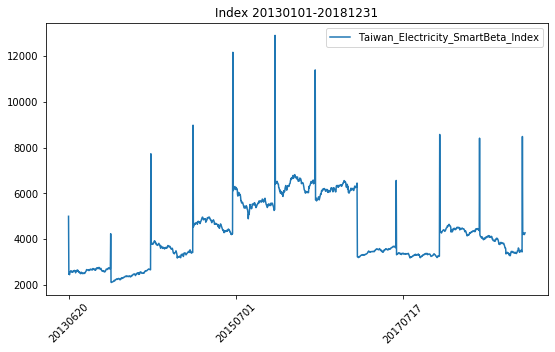

In [136]:
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index['Date']
ax1.plot(np.arange(len(Date)),df_index['SmartBeta_Index'],label='Taiwan_Electricity_SmartBeta_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index 20130101-20181231")

plt.legend()
plt.show()

In [137]:
df_TWSE=pd.read_csv('TWSE.csv',sep=',',engine='python',encoding='big5')

In [138]:
#整理參考指數資料
df_TWSE = df_TWSE.pivot(index='年月日', columns='證券代碼', values='收盤價')
df_TWSE['年月日'] = df_TWSE.index
df_TWSE = df_TWSE.reset_index(drop=True)
df_TWSE =  df_TWSE.dropna().reset_index(drop=True)

In [139]:
df_index_TWSE = pd.merge(left=df_index,right=df_TWSE,left_on=['Date'],right_on=['年月日'],how='left')
df_index_TWSE.columns = df_index_TWSE.columns.str.replace(' ','')
df_index_TWSE = df_index_TWSE.dropna()

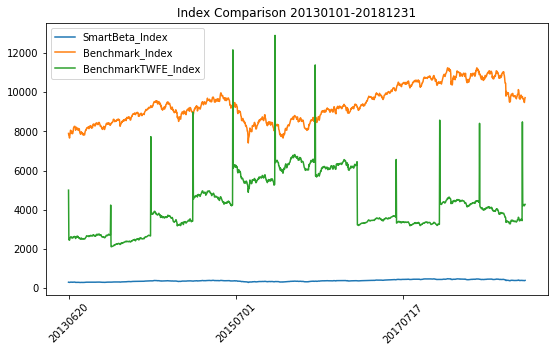

In [140]:
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_TWSE['Date']
ax1.plot(np.arange(len(Date)),df_index_TWSE['TWFE'],label='SmartBeta_Index')
ax1.plot(np.arange(len(Date)),df_index_TWSE['Y9999'],label='Benchmark_Index')
ax1.plot(np.arange(len(Date)),df_index_TWSE['SmartBeta_Index'],label='BenchmarkTWFE_Index')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("Index Comparison 20130101-20181231")

plt.legend()
plt.show()

#https://stackoverflow.com/questions/50128668/change-the-tick-frequency-when-value-of-x-axis-is-string
#解決太多ticks

In [141]:
df_index_TWSE['index_return'] = df_index_TWSE['SmartBeta_Index']/df_index_TWSE['SmartBeta_Index'].shift(1)  
df_index_TWSE['index_return_cum'] = df_index_TWSE['index_return'].cumprod()
df_index_TWSE['benchmark_return'] = df_index_TWSE['Y9999']/df_index_TWSE['Y9999'].shift(1) 
df_index_TWSE['benchmark_return_cum'] = df_index_TWSE['benchmark_return'].cumprod()
df_index_TWSE['benchmarkTWFE_return'] = df_index_TWSE['TWFE']/df_index_TWSE['TWFE'].shift(1) 
df_index_TWSE['benchmarkTWFE_return_cum'] = df_index_TWSE['benchmarkTWFE_return'].cumprod()

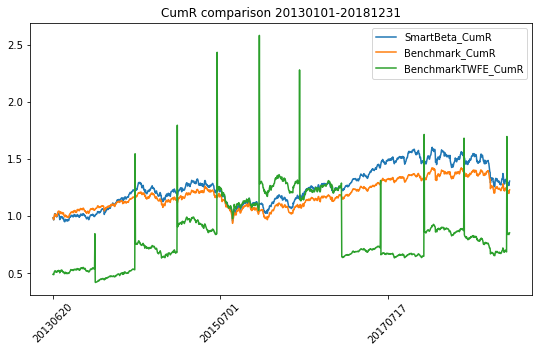

In [142]:
fig, ax1 = plt.subplots(1,1, figsize=(9,5))

Date = df_index_TWSE['Date']
ax1.plot(np.arange(len(Date)),df_index_TWSE['benchmarkTWFE_return_cum'],label='SmartBeta_CumR')
ax1.plot(np.arange(len(Date)),df_index_TWSE['benchmark_return_cum'],label='Benchmark_CumR')
ax1.plot(np.arange(len(Date)),df_index_TWSE['index_return_cum'],label='BenchmarkTWFE_CumR')

ax1.set_xticks(np.arange(len(Date))[::500])
ax1.set_xticklabels(Date[::500], rotation=45)
ax1.set_title("CumR comparison 20130101-20181231")

plt.legend()
plt.show()

#https://stackoverflow.com/questions/50128668/change-the-tick-frequency-when-value-of-x-axis-is-string
#解決太多ticks

In [143]:
df_index_TWSE.describe()

,SmartBeta_Index,Date,TWFE,Y9999,年月日,index_return,index_return_cum,benchmark_return,benchmark_return_cum,benchmarkTWFE_return,benchmarkTWFE_return_cum
count,1365.000000,1.365000e+03,1365.000000,1365.000000,1.365000e+03,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,4243.793288,2.015772e+07,373.956952,9379.381634,2.015772e+07,1.005219,0.848648,1.000186,1.187565,1.000243,1.260663
std,1380.506716,1.614085e+04,51.041819,931.078061,1.614085e+04,0.127528,0.276172,0.008183,0.117808,0.009622,0.171962
min,2106.506771,2.013062e+07,282.440000,7410.340000,2.013062e+07,0.493345,0.421301,0.936875,0.938147,0.933622,0.952002
25%,3313.941388,2.014110e+07,333.460000,8599.900000,2.014110e+07,0.994404,0.662788,0.996270,1.088836,0.995089,1.124933
50%,3898.121160,2.016033e+07,369.600000,9240.710000,2.016033e+07,1.000481,0.778039,1.000565,1.169963,1.000655,1.245820
75%,5465.590178,2.017082e+07,419.170000,10087.420000,2.017082e+07,1.005710,1.093238,1.005058,1.277094,1.006041,1.413552
max,12908.148233,2.018123e+07,475.650000,11253.110000,2.018123e+07,2.906841,2.581630,1.035801,1.424641,1.045491,1.603243
